In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,"../")

In [4]:
from pyathena.tigresspp.load_sim_tigresspp import LoadSimTIGRESSPPAll

In [5]:
sim_dict = { 'crmhd_v2-8pc-b1-diode-lngrad_out': '/scratch/gpfs/EOST/changgoo/tigress_classic/crmhd_v2-8pc-b1-mhdbc_diode-crbc_lngrad_out-icpx',
            'mhd_v2-8pc-b1-diode': '/scratch/gpfs/EOST/changgoo/tigress_classic/mhd_v2-8pc-b1-mhdbc_diode-icpx'}

sa = cr_zprof.LoadSimTIGRESSPPAll(sim_dict)

In [8]:
sa.models

['crmhd_v2-8pc-b1-diode-lngrad_out', 'mhd_v2-8pc-b1-diode']

In [9]:
for m in sa.models:
    print(m)
    s = sa.set_model(m)
    s.read_hst()

crmhd_v2-8pc-b1-diode-lngrad_out
mhd_v2-8pc-b1-diode


In [11]:
import matplotlib.pyplot as plt

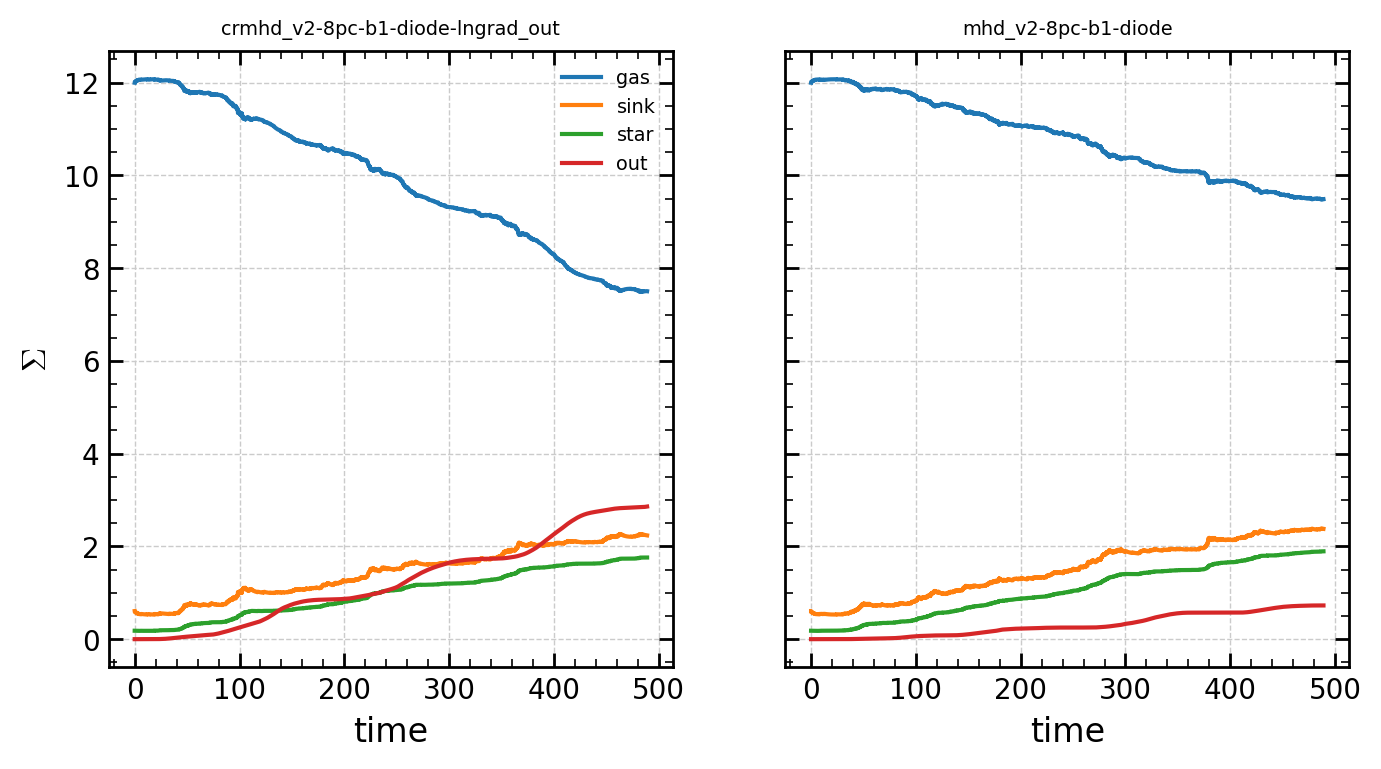

In [12]:
fig,axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
for m,ax in zip(sa.models,axes):
    s = sa.set_model(m)
    plt.sca(ax)
    plt.title(m,fontsize="xx-small")
    h = s.hst
    plt.plot(h["time"], h["Sigma_gas"], label="gas")
    if "Sigma_msink" in h:
        plt.plot(h["time"], h["Sigma_msink"], label="sink")
    else:
        if "Sigma_sp" in h:
            plt.plot(h["time"], h["Sigma_sp"], label="sink")
        if "Sigma_sp_rm" in h:
            plt.plot(
                h["time"], h["Sigma_sp"] + h["Sigma_sp_rm"], label="sink,total"
            )
    if "Sigma_mstar" in h:
        plt.plot(h["time"], h["Sigma_mstar"], label="star")
    if "Sigma_out" in h:
        plt.plot(h["time"], h["Sigma_out"], label="out")
    plt.xlabel("time")
plt.sca(axes[0])
plt.ylabel(r"$\Sigma$")
plt.legend(fontsize="xx-small", frameon=False)

Text(0, 0.5, '$\\Delta m [M_\\odot]$')

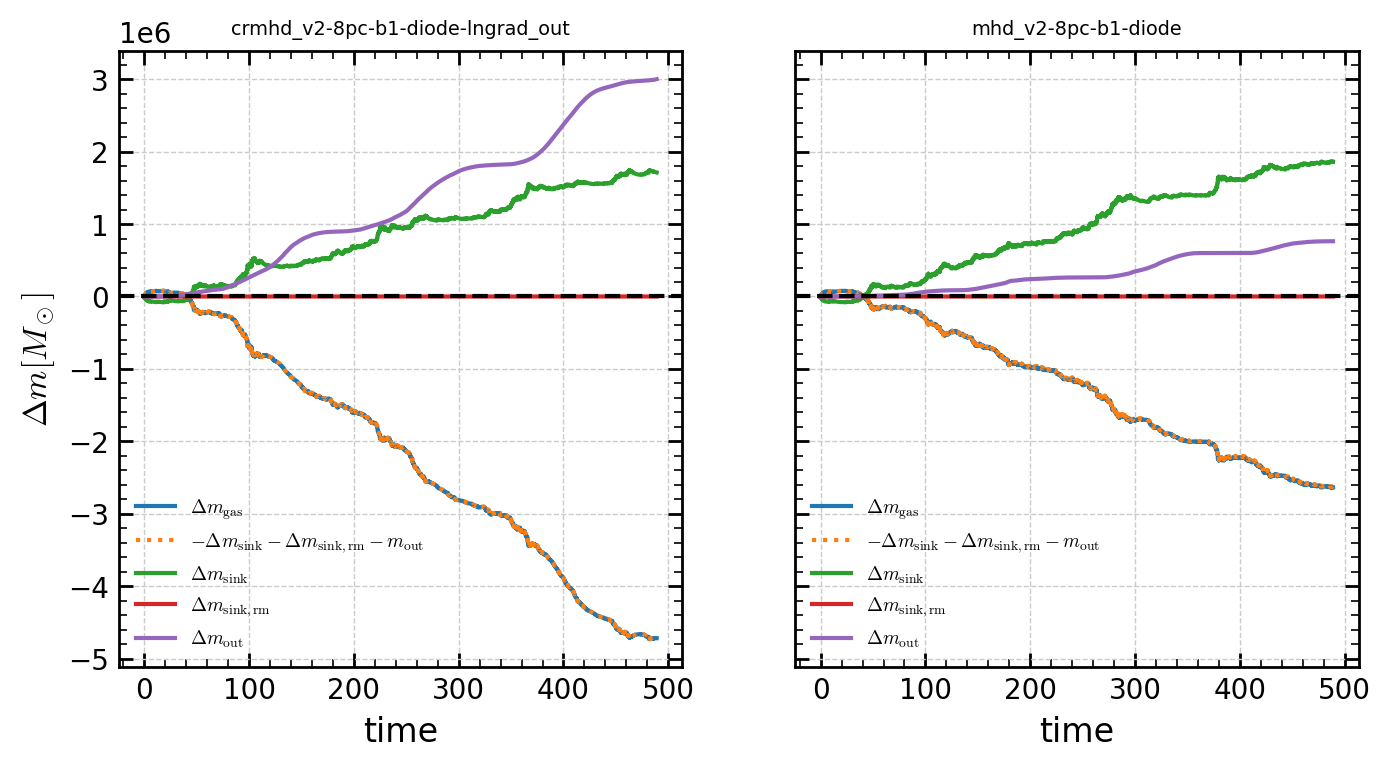

In [14]:
import numpy as np
fig,axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
for m,ax in zip(sa.models,axes):
    s = sa.set_model(m)
    plt.sca(ax)
    plt.title(m,fontsize="xx-small")
    h = s.hst
    dm = h["mass"] - h["mass"].iloc[0]
    mloss = h["mass_out"] - h["mass_out"].iloc[0]
    if "msink" in h:
        dmsp = h["msink"] - h["msink"].iloc[0]
    else:
        dmsp = h["mass_sp"] - h["mass_sp"].iloc[0]
    if "mass_sp_rm" in h:
        dmsp_removed = h["mass_sp_rm"] - h["mass_sp_rm"].iloc[0]
    else:
        dmsp_removed = np.zeros_like(h["time"])
    mtot = h["mass"].iloc[0]

    plt.plot(h["time"], dm, label=r"$\Delta m_{\rm gas}$")
    plt.plot(
        h["time"],
        -dmsp - dmsp_removed - mloss,
        label=r"$-\Delta m_{\rm sink}-\Delta m_{\rm sink,rm}-m_{\rm out}$",
        ls=":",
    )
    plt.plot(h["time"], dmsp, label=r"$\Delta m_{\rm sink}$")
    plt.plot(h["time"], dmsp_removed, label=r"$\Delta m_{\rm sink,rm}$")
    plt.plot(h["time"], mloss, label=r"$\Delta m_{\rm out}$")
    plt.axhline(0, ls="--", color="k")
    plt.legend(fontsize="xx-small", frameon=False)
    plt.xlabel("time")
plt.sca(axes[0])
plt.ylabel(r"$\Delta m [M_\odot]$")


Text(0, 0.5, '$(\\Delta m_{\\rm gas}+\\Delta m_{\\rm sink}+\\Delta m_{\\rm sink,rm}$$+\\Delta m_{\\rm out})/m_{\\rm gas}(0)$')

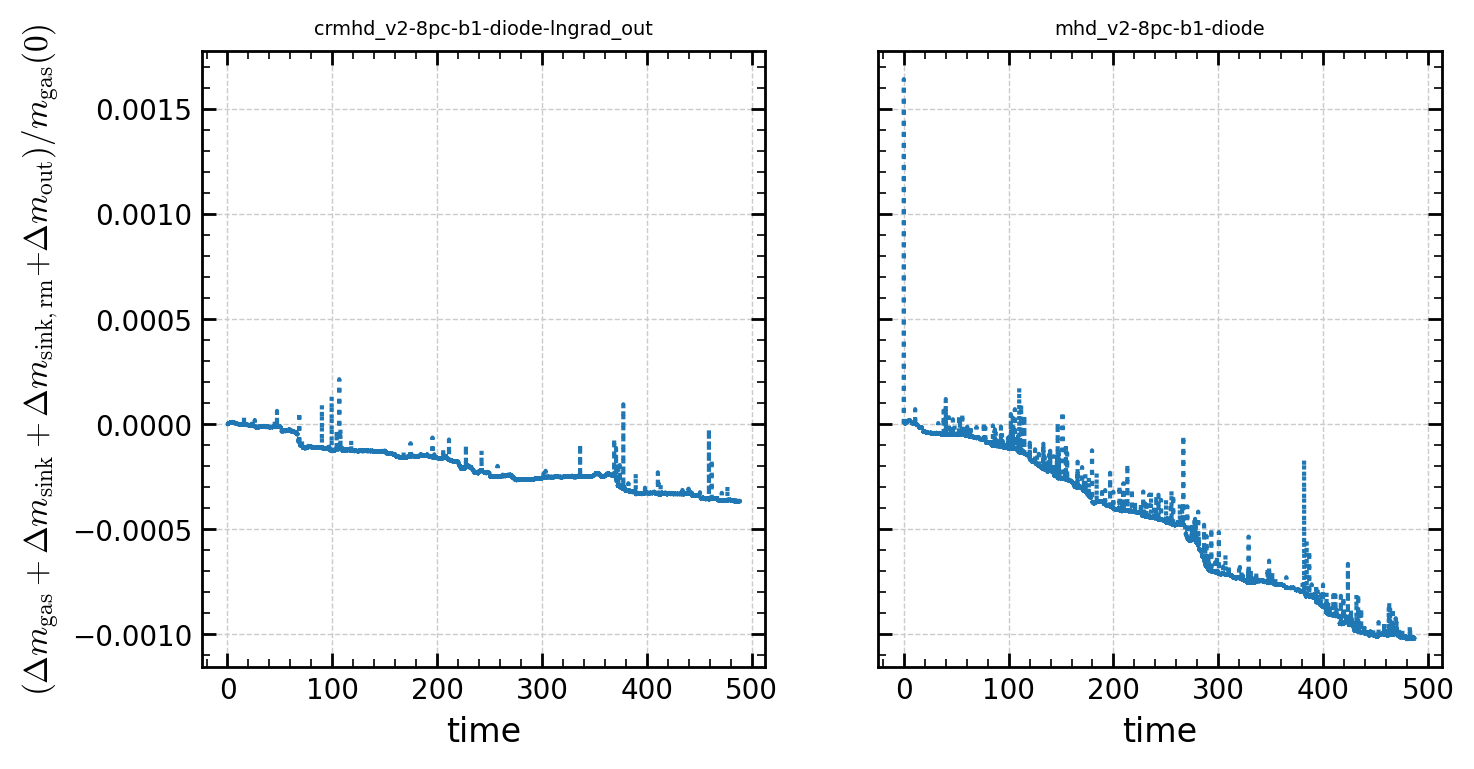

In [15]:
import numpy as np
fig,axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
for m,ax in zip(sa.models,axes):
    s = sa.set_model(m)
    plt.sca(ax)
    plt.title(m,fontsize="xx-small")
    h = s.hst
    dm = h["mass"] - h["mass"].iloc[0]
    mloss = h["mass_out"] - h["mass_out"].iloc[0]
    if "msink" in h:
        dmsp = h["msink"] - h["msink"].iloc[0]
    else:
        dmsp = h["mass_sp"] - h["mass_sp"].iloc[0]
    if "mass_sp_rm" in h:
        dmsp_removed = h["mass_sp_rm"] - h["mass_sp_rm"].iloc[0]
    else:
        dmsp_removed = np.zeros_like(h["time"])
    mtot = h["mass"].iloc[0]
    plt.plot(h["time"], ((dm) + dmsp + dmsp_removed + mloss) / mtot, ls=":")
    plt.xlabel("time")
plt.sca(axes[0])
plt.ylabel(
    r"$(\Delta m_{\rm gas}+\Delta m_{\rm sink}+\Delta m_{\rm sink,rm}$"
    r"$+\Delta m_{\rm out})/m_{\rm gas}(0)$"
)